In [1]:
import numpy as np
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.optimizers import Adam
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
timestamp = [-2070, -1600, -1046, -771, -238.5, -206, 16.5, 220, 272.5, 316, 420, 585, 
            618, 907, 969.5, 1127, 1279, 1368, 1644, 1911, 1949]

In [3]:
len(timestamp)

21

In [4]:
seq_len = 2

In [5]:
data = []
for i in range(len(timestamp) - seq_len + 1):
    data.append(timestamp[i:i+seq_len])

data

[[-2070, -1600],
 [-1600, -1046],
 [-1046, -771],
 [-771, -238.5],
 [-238.5, -206],
 [-206, 16.5],
 [16.5, 220],
 [220, 272.5],
 [272.5, 316],
 [316, 420],
 [420, 585],
 [585, 618],
 [618, 907],
 [907, 969.5],
 [969.5, 1127],
 [1127, 1279],
 [1279, 1368],
 [1368, 1644],
 [1644, 1911],
 [1911, 1949]]

In [6]:
train_size = int(0.9*len(data))
data = np.array(data)
# np.random.shuffle(data)
print(data.shape)

(20, 2)


In [7]:
mean = np.mean(data)
std = np.std(data)

In [8]:
print(mean)
print(std)

386.575
985.3624938950132


In [9]:
data = (data - np.mean(data)) / np.std(data)

In [10]:
X_train = data[:train_size,:-1]
y_train = data[:train_size,-1]

X_test = data[train_size:,:-1]
y_test = data[train_size:,-1]

In [11]:
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)
print(X_train.shape)

(18, 1)


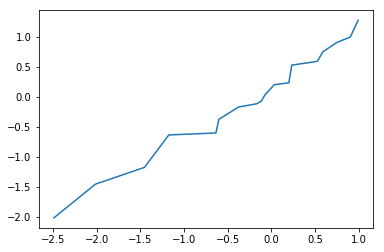

In [12]:
plt.plot(X_train.reshape(X_train.shape[0],1),y_train.reshape(y_train.shape[0],1))

In [13]:
model = Sequential()
model.add(Dense(128,input_shape=(1,)))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

adam = Adam(lr=1e-4)
model.compile(loss='mse',optimizer=adam)

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               256       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
_________________________________________________________________


In [15]:
y_train.shape

(18, 1)

In [16]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 66ms/step


3.3053205013275146

In [17]:
hist = model.fit(X_train,y_train,epochs=2000,batch_size=4,verbose=0)

In [18]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step


0.015196827240288258

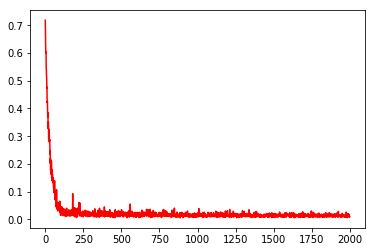

In [19]:
loss = hist.history['loss']
plt.plot(loss,'r-')

In [20]:
# model.save('D:/数据/country_fate.h5')

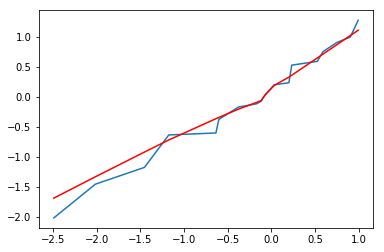

In [21]:
y_ = model.predict(X_train)
plt.plot(X_train,y_train)
plt.plot(X_train,y_,'r-')

In [22]:
x = np.array([(1949 - mean) / std])
y = model.predict(x)
print(y * std + mean)

[[2052.3835]]


In [23]:
import torch
import torch.nn.functional as F

In [24]:
class CountryNet(torch.nn.Module):
    def __init__(self, D_in, D_out):
        super(CountryNet,self).__init__()
        self.linear1 = torch.nn.Linear(D_in,1024)
        self.linear2 = torch.nn.Linear(1024,512)
        self.linear3= torch.nn.Linear(512,256)
        self.out = torch.nn.Linear(256,D_out)
    
    def forward(self,x):
        h1 = self.linear1(x)
        h2 = F.relu(self.linear2(h1))
        h3 = F.relu(self.linear3(h2))
        y_pred = self.out(h3)
        return y_pred

In [25]:
D_in, D_out = 1, 1
country_net = CountryNet(D_in,D_out)

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(country_net.parameters(),lr=1e-4)

Xs = torch.autograd.Variable(torch.from_numpy(X_train)).float()
ys = torch.autograd.Variable(torch.from_numpy(y_train)).float()

Loss = []

for t in range(30000):
    y_pred = country_net(Xs)
    loss = criterion(y_pred,ys)
    
    Loss.append(loss.item())
    
    if t % 1000 == 0:
        print(t, loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 12.976211547851562
1000 0.1704263836145401
2000 0.15635338425636292
3000 0.14923568069934845
4000 0.14447246491909027
5000 0.14050418138504028
6000 0.13710464537143707
7000 0.1343967467546463
8000 0.13205182552337646
9000 0.1302642673254013
10000 0.128895565867424
11000 0.12767605483531952
12000 0.1267135739326477
13000 0.12585404515266418
14000 0.12509728968143463
15000 0.12439597398042679
16000 0.12376238405704498
17000 0.12316073477268219
18000 0.12260293960571289
19000 0.12207385152578354
20000 0.12157071381807327
21000 0.1210843101143837
22000 0.12061546742916107
23000 0.12015805393457413
24000 0.11960137635469437
25000 0.11904575675725937
26000 0.11860888451337814
27000 0.11817952990531921
28000 0.11775054782629013
29000 0.11732649803161621


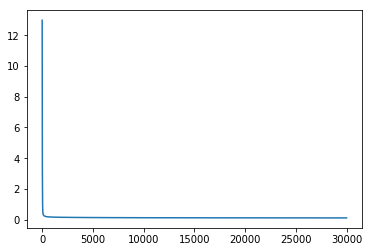

In [26]:
plt.plot(Loss)

In [31]:
x = torch.Tensor([(1949 - mean) / std])
y = country_net(x)
print(y * std + mean)

tensor([2144.2532], grad_fn=<AddBackward>)


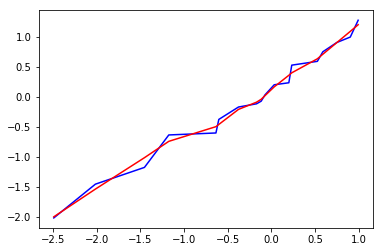

In [28]:
y_pred = country_net(Xs)
# print(y_pred.detach().numpy())
plt.plot(Xs.detach().numpy(),ys.detach().numpy(),'b-')
plt.plot(Xs.detach().numpy(),y_pred.detach().numpy(),'r-')

## save and load the PyTorch model

In [33]:
torch.save(country_net,'D:/数据/CountryNet_pytorch.pt')

D:\Python\anaconda\lib\site-packages\torch\serialization.py:241: UserWarning: Couldn't retrieve source code for container of type CountryNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [34]:
my_model = torch.load('D:/数据/CountryNet_pytorch.pt')

In [37]:
x = torch.Tensor([(16.5 - mean) / std])
y = my_model(x)
print(y * std + mean)

tensor([181.1911], grad_fn=<AddBackward>)
